In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [135]:
cases=pd.read_csv('confirmed_cases.csv')
cases.head()

,id,confirmed
0,1,6
1,2,9
2,3,1
3,4,14
4,5,14


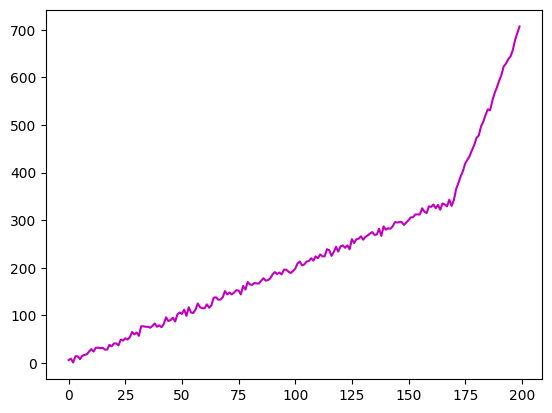

In [136]:
import matplotlib.pyplot as plt
x=np.array(cases['id']).reshape(-1,1)
y=np.array(cases['confirmed']).reshape(-1,1)
plt.plot(y,'-m')

In [137]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat=PolynomialFeatures(degree=3)
x=poly_feat.fit_transform(x)

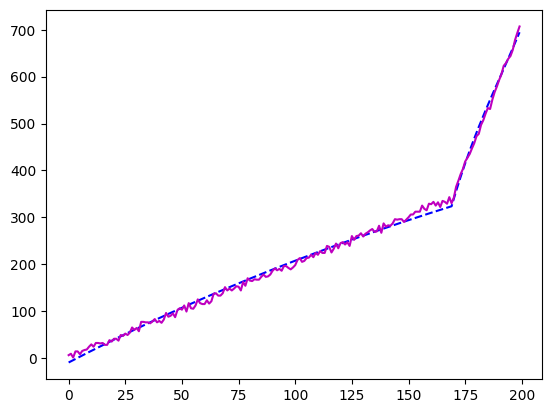

In [138]:
model=LinearRegression()
model.fit(x,y)
y_predict=model.predict(x)
plt.plot(y_predict,'--b')
plt.plot(y,'-m')

In [139]:
model.score(x,y)

0.9972493691279275

In [147]:
cur_days=y.shape[0]
print(cur_days)

200


In [152]:
add_days=20
pred_days=cur_days+add_days
x_pred=poly_feat.fit_transform([[pred_days]])
y_pred=model.predict(x_pred)
print(pred_days)
print(x_pred)
print(y_pred)

220
[[1.0000e+00 2.2000e+02 4.8400e+04 1.0648e+07]]
[[394.3689459]]


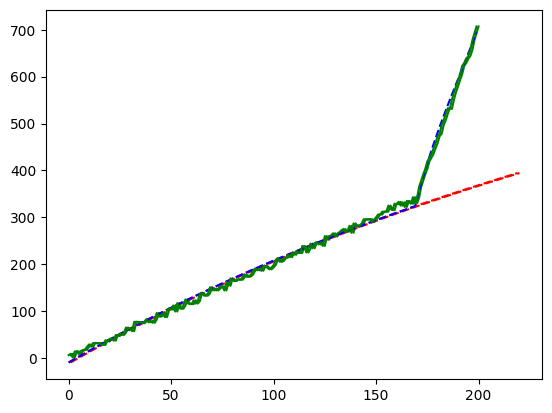

In [154]:
x1=np.array(list(range(1,pred_days+1))).reshape(-1,1)
y1=model.predict(poly_feat.fit_transform(x1))
plt.plot(x1, y1, '--r', label='Prediction (1 to 204)')
plt.plot(range(1, cur_days + 1), y, '-g', label='Actual data')
plt.plot(y1,'--r')
plt.plot(y_predict,'--b')
plt.plot(y,'-g')